In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df =  pd.read_csv("/content/drive/MyDrive/Data Challenge/campus boundary.csv")

In [ ]:
BBox = (-76.9804, -76.9001, 38.9685, 39.0152)

In [ ]:
cp = plt.imread("/content/drive/MyDrive/Data Challenge/Plotting/map.png")

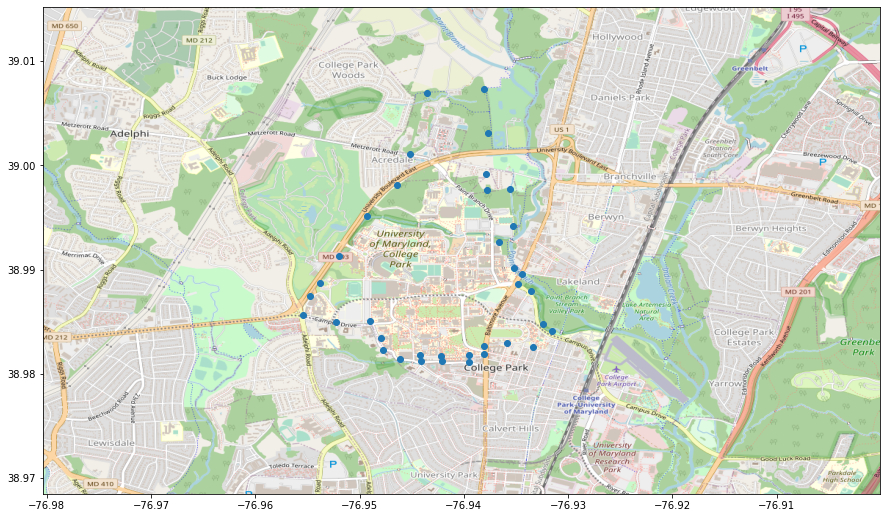

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(df.Lon, df.Lat, zorder=1)
ax.imshow(cp, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
from shapely.geometry import Point, Polygon, mapping

In [ ]:
polyPoints = []

for index, row in df.iterrows():
  polyPoints.append([row['Lat'], row['Lon']])

poly = Polygon(polyPoints)

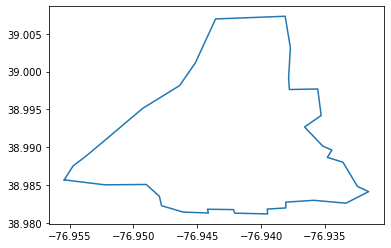

In [ ]:
x,y = poly.exterior.xy
plt.plot(y,x)

In [ ]:
def is_within(df_location):
  df_temp = pd.DataFrame(columns = ['Start Location', 'End Location']) 
  for i in range(len(df_location)):
    row = df_location.iloc[[i]]
    start_point = Point(row["START LAT"], row["START LONG"])
    end_point = Point(row["END LAT"], row["END LONG"])
    if(start_point.within(poly)):
      start = "On Campus"
    else:
      start = "Off Campus"

    if(end_point.within(poly)):
      end = "On Campus"
    else:
      end = "Off Campus"
    data = {'Start Location' : start, 'End Location' : end}
    df_temp = df_temp.append(data, ignore_index = True)

  df_location = pd.concat([df_location, df_temp], axis=1)
  return df_location

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Data Challenge/Data_Lv3_UMDOTS_Escooters.csv")

In [ ]:
df3 = is_within(df2)

In [ ]:
df3.head(10)

,Unnamed: 0,Unnamed: 0.1,CREATED,START,END,DISTANCE,RIDE_ID,CUSTOMER_ID,MINUTES,VEHICLE_TYPE,PATH,TIMESTAMPS,START LONG,START LAT,END LONG,END LAT,Start Location,End Location
0,0,0,2020-10-03 03:32:15+00:00,2020-10-03 03:32:15+00:00,2020-10-03 03:32:46+00:00,0.008,3135665,193964,1,Scooter,"{\n ""coordinates"": [\n [\n -76.934163...","[\n ""2020-10-03T03:32:14Z"",\n ""2020-10-03T03...",-76.934163,38.990656,-76.934285,38.990739,Off Campus,Off Campus
1,1,1,2020-10-03 03:07:39+00:00,2020-10-03 03:07:39+00:00,2020-10-03 03:37:06+00:00,1.062,3135395,542947,30,Scooter,"{\n ""coordinates"": [\n [\n -76.938180...","[\n ""2020-10-03T03:07:46Z"",\n ""2020-10-03T03...",-76.938181,38.982087,-76.949165,38.992849,On Campus,On Campus
2,2,2,2020-10-03 03:17:05+00:00,2020-10-03 03:17:05+00:00,2020-10-03 03:24:24+00:00,0.847,3135503,517321,8,Scooter,"{\n ""coordinates"": [\n [\n -76.937599...","[\n ""2020-10-03T03:17:12Z"",\n ""2020-10-03T03...",-76.937600,38.979613,-76.933335,38.992676,Off Campus,Off Campus
3,3,3,2020-10-03 02:24:58+00:00,2020-10-03 02:24:58+00:00,2020-10-03 03:11:56+00:00,3.447,3134955,578051,47,Scooter,"{\n ""coordinates"": [\n [\n -76.943553...","[\n ""2020-10-03T02:25:04Z"",\n ""2020-10-03T02...",-76.943553,38.982470,-76.943546,38.982476,On Campus,On Campus
4,4,4,2020-10-03 03:19:34+00:00,2020-10-03 03:19:34+00:00,2020-10-03 03:22:45+00:00,0.386,3135529,552305,4,Scooter,"{\n ""coordinates"": [\n [\n -76.938115...","[\n ""2020-10-03T03:19:40Z"",\n ""2020-10-03T03...",-76.938116,38.982084,-76.943257,38.986101,On Campus,On Campus
5,5,5,2020-10-03 03:26:35+00:00,2020-10-03 03:26:35+00:00,2020-10-03 03:28:04+00:00,0.047,3135596,561610,2,Scooter,"{\n ""coordinates"": [\n [\n -76.942696...","[\n ""2020-10-03T03:26:41Z"",\n ""2020-10-03T03...",-76.942697,38.985485,-76.942983,38.985307,On Campus,On Campus
6,6,6,2020-10-03 03:48:16+00:00,2020-10-03 03:48:16+00:00,2020-10-03 03:54:02+00:00,0.537,3135801,529271,6,Scooter,"{\n ""coordinates"": [\n [\n -76.938533...","[\n ""2020-10-03T03:48:22Z"",\n ""2020-10-03T03...",-76.938534,38.981016,-76.942219,38.986581,Off Campus,On Campus
7,7,7,2020-10-03 03:57:28+00:00,2020-10-03 03:57:28+00:00,2020-10-03 03:59:51+00:00,0.183,3135899,324163,3,Scooter,"{\n ""coordinates"": [\n [\n -76.936791...","[\n ""2020-10-03T03:57:35Z"",\n ""2020-10-03T03...",-76.936792,38.988329,-76.939991,38.987032,On Campus,On Campus
8,8,8,2020-10-03 03:03:19+00:00,2020-10-03 03:03:19+00:00,2020-10-03 03:14:17+00:00,0.206,3135336,328205,11,Scooter,"{\n ""coordinates"": [\n [\n -76.934581...","[\n ""2020-10-03T03:03:26Z"",\n ""2020-10-03T03...",-76.934581,38.983489,-76.934501,38.983441,On Campus,On Campus
9,9,9,2020-10-03 03:34:29+00:00,2020-10-03 03:34:29+00:00,2020-10-03 03:39:34+00:00,0.703,3135687,578251,6,Scooter,"{\n ""coordinates"": [\n [\n -76.934302...","[\n ""2020-10-03T03:34:36Z"",\n ""2020-10-03T03...",-76.934303,38.990641,-76.945620,38.992826,Off Campus,On Campus


In [ ]:
from google.colab import files
df3.to_csv('data_boundary.csv') 
files.download('data_boundary.csv')

In [ ]:
exits =  pd.read_csv("/content/drive/MyDrive/Data Challenge/campus exits.csv")

In [ ]:
!pip install haversine

In [ ]:
import haversine as hs
from haversine import Unit

In [ ]:
exit_lon = exits['Lon'].to_numpy()
exit_lat = exits['Lat'].to_numpy()

exit_count = [] * 11

s = pd.Series(df2['PATH'])

for i in range(50):
  loc = json.loads(s.loc[i])
  df_temp = pd.DataFrame.from_dict(loc)
  lat = df_temp['coordinates'].str.get(1)
  lon = df_temp['coordinates'].str.get(0)
  df_pos = pd.DataFrame(columns = ['Lat', 'Lon']) 
  df_pos["Lat"] = lat
  df_pos["Lon"] = lon

  for j in range(len(exits)):
    exit_loc = (float(lat[j]), float(lon[j]))
    for k in range(len(df_pos)):
      loc2 = (float(df_pos[k]), float(df_pos[k]))
      if hs.haversine(loc1, loc2,unit=Unit.METERS) <=50:
        exit_count[j] = exit_count[j] + 1
        break

In [ ]:
exits["Count"] = exit_count
print(exits)